## Check MTCNN Pnet and Onet
the network is adapted for license plate recognition.
network output consists of classification and offset

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict
from MTCNN.model.MTCNN_nets import PNet, ONet

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
Pnet = PNet().to(device)
Onet = ONet().to(device)
P_input = torch.Tensor(5, 3, 120, 47).to(device)
P_offset, P_prob = Pnet(P_input)
print('P_offset shape is', P_offset.shape)
print('P_prob shape is', P_prob.shape)
O_input = torch.Tensor(5, 3, 24, 94).to(device)
O_offset, O_prob = Onet(O_input)
print('O_offset shape is', O_offset.shape)
print('O_prob shape is', O_prob.shape)
from torchsummary import summary
summary(Pnet, (3,12,47))
summary(Onet, (3,24,94))

P_offset shape is torch.Size([5, 4, 55, 1])
P_prob shape is torch.Size([5, 2, 55, 1])
O_offset shape is torch.Size([5, 4])
O_prob shape is torch.Size([5, 2])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 10, 45]             280
             PReLU-2           [-1, 10, 10, 45]              10
         MaxPool2d-3             [-1, 10, 5, 9]               0
            Conv2d-4             [-1, 16, 3, 5]           2,416
             PReLU-5             [-1, 16, 3, 5]              16
            Conv2d-6             [-1, 32, 1, 1]           7,712
             PReLU-7             [-1, 32, 1, 1]              32
            Conv2d-8              [-1, 2, 1, 1]              66
            Conv2d-9              [-1, 4, 1, 1]             132
Total params: 10,664
Trainable params: 10,664
Non-trainable params: 0
----------------------------------------------------------------
In

# Prepare data for training MTCNN


In [3]:
!python3 MTCNN/data_set/preprocess.py -image /home/zwzj/Downloads/CCPD2019/ccpd_base -dir_train ccpd/ccpd_train -dir_val ccpd/ccpd_val

image data processing is kicked off...
199996 images in total
100 images done
200 images done
300 images done
400 images done
500 images done
600 images done
700 images done
800 images done
900 images done
1000 images done
1100 images done
1200 images done
1300 images done
1400 images done
1500 images done
1600 images done
1700 images done
1800 images done
1900 images done
2000 images done
2100 images done
2200 images done
2300 images done
2400 images done
2500 images done
2600 images done
2700 images done
2800 images done
2900 images done
3000 images done
3100 images done
3200 images done
3300 images done
3400 images done
3500 images done
3600 images done
3700 images done
3800 images done
3900 images done
4000 images done
4100 images done
4200 images done
4300 images done
4400 images done
4500 images done
4600 images done
4700 images done
4800 images done
4900 images done
5000 images done
image data processing done, write 3750 training images, 1250 val images


In [6]:
!cd MTCNN/data_preprocessing && python3 gen_Pnet_train_data.py &> /dev/null

In [7]:
!cd MTCNN/data_preprocessing && python3 assemble_Pnet__train_imglist.py

anno_store/pos_12_train.txt
anno_store/part_12_train.txt
anno_store/neg_12_train.txt
PNet train annotation result file path:anno_store/imglist_anno_12_train.txt


In [10]:
!cd MTCNN/data_preprocessing && python3 gen_Pnet_val_data.py

2500 pics in total
../../ccpd/ccpd_val/0248922413793-84_93-340&543_589&640-602&626_331&655_338&553_609&524-0_0_16_22_33_32_32-108-39.jpg
1 images done, pos: 0 part: 1 neg: 39
../../ccpd/ccpd_val/0288493773946-90_84-174&500_505&603-523&603_182&597_173&491_514&497-0_0_30_32_26_19_29-135-37.jpg
2 images done, pos: 3 part: 3 neg: 79
../../ccpd/ccpd_val/0760-16_14-193&459_509&660-509&568_196&660_193&551_506&459-0_0_7_1_33_30_31-55-35.jpg
3 images done, pos: 3 part: 5 neg: 118
../../ccpd/ccpd_val/0340996168583-92_77-196&502_551&596-547&615_198&592_190&492_539&515-0_12_27_12_31_25_31-71-151.jpg
4 images done, pos: 5 part: 6 neg: 157
../../ccpd/ccpd_val/0150-2_1-127&340_307&410-307&402_128&410_127&348_306&340-0_0_24_31_30_27_25-100-20.jpg
5 images done, pos: 7 part: 9 neg: 196
../../ccpd/ccpd_val/0216570881226-90_86-229&467_547&545-555&564_221&558_223&451_557&457-0_0_13_22_26_29_32-159-49.jpg
6 images done, pos: 8 part: 10 neg: 234
../../ccpd/ccpd_val/0183620689655-95_76-289&477_513&551-524&57

In [9]:
!cd MTCNN/data_preprocessing && python3 assemble_Pnet_val_imglist.py

anno_store/pos_12_val.txt
anno_store/part_12_val.txt
anno_store/neg_12_val.txt
PNet val annotation result file path:anno_store/imglist_anno_12_val.txt


In [11]:
!head MTCNN/data_preprocessing/anno_store/imglist_anno_12_train.txt

../data_set/train/12/positive/3237.jpg 1 -0.00 0.00 0.15 -0.24
../data_set/train/12/positive/2998.jpg 1 -0.10 0.00 0.08 -0.13
../data_set/train/12/positive/1663.jpg 1 -0.04 0.00 -0.20 -0.01
../data_set/train/12/positive/2486.jpg 1 0.09 -0.07 0.08 -0.06
../data_set/train/12/positive/2.jpg 1 -0.02 0.18 -0.02 0.23
../data_set/train/12/positive/2779.jpg 1 0.03 0.10 0.14 -0.04
../data_set/train/12/positive/2589.jpg 1 0.14 0.12 0.10 0.05
../data_set/train/12/positive/2187.jpg 1 0.01 -0.14 -0.19 0.10
../data_set/train/12/positive/1388.jpg 1 -0.14 -0.08 0.18 -0.09
../data_set/train/12/positive/2910.jpg 1 0.23 0.03 0.04 -0.08


In [ ]:
!cd MTCNN/train && python3 Train_Pnet.py

training dataset loaded with length : 96409
validation dataset loaded with length : 53028
Pnet loaded
Epoch 0/99
----------
train Loss: 0.0122 accuracy: 0.9746 cls Loss: 0.0883 offset Loss: 0.0174
val Loss: 0.0247 accuracy: 0.9868 cls Loss: 0.0341 offset Loss: 0.0401
Epoch 1/99
----------
train Loss: 0.0072 accuracy: 0.9882 cls Loss: 0.0316 offset Loss: 0.0110
val Loss: 0.0254 accuracy: 0.9896 cls Loss: 0.0270 offset Loss: 0.0415
Epoch 2/99
----------
train Loss: 0.0061 accuracy: 0.9909 cls Loss: 0.0249 offset Loss: 0.0093
val Loss: 0.0240 accuracy: 0.9903 cls Loss: 0.0262 offset Loss: 0.0391
Epoch 3/99
----------
train Loss: 0.0053 accuracy: 0.9927 cls Loss: 0.0199 offset Loss: 0.0082
val Loss: 0.0264 accuracy: 0.9930 cls Loss: 0.0177 offset Loss: 0.0434
Epoch 4/99
----------
train Loss: 0.0049 accuracy: 0.9947 cls Loss: 0.0154 offset Loss: 0.0076
val Loss: 0.0249 accuracy: 0.9951 cls Loss: 0.0138 offset Loss: 0.0411
Epoch 5/99
----------
train Loss: 0.0044 accuracy: 0.9959 cls Loss: 

# look at an image

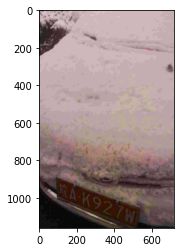

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('ccpd/ccpd_train/1609-16_13-89&832_500&1159-488&1159_89&1049_101&832_500&951-0_0_9_33_26_31_20-30-36.jpg')
plt.imshow(image)

# License_Plate_Detection_Pytorch

This is a two stage lightweight and robust license plate recognition in MTCNN and LPRNet using Pytorch. MTCNN is a very well-known real-time detection model primarily designed for human face recognition. It is modified for license plate detection. LPRNet, another real-time end-to-end DNN, is utilized for the subsquent recognition. This network is attributed by its superior performance with low computational cost without preliminary character segmentation. The Spatial Transformer Layer is embeded in this work to allow a better characteristics for recognition. The recognition accuracy is up to 99% on CCPD base dataset with ~ 80 ms/image on Nivida Quadro P4000. Here is the illustration of the proposed pipeline:

<img src="test/pipeline.png"  width="600" style="float: left;">

## MTCNN 

The modified MTCNN structure is presented as below. Only proposal net (Pnet) and output net (Onet) are used in this work since it is found that skipping Rnet will not hurt the accuracy in this case. The Onet accepts 24(height) x 94(width) BGR image which is consistent with input for LPRNet.

<img src="test/MTCNN.png"  width="600" style="float: left;">

The MTCNN test code is shown as below: 

In [1]:
import sys
sys.path.append('./LPRNet')
sys.path.append('./MTCNN')
from LPRNet_Test import *
from MTCNN import *
import numpy as np
import argparse
import torch
import time
import cv2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

image = cv2.imread('test/7.jpg')
input = np.copy(image)
bboxes = create_mtcnn_net(input, (50, 15), device, p_model_path='MTCNN/weights/pnet_Weights', o_model_path='MTCNN/weights/onet_Weights')

for i in range(bboxes.shape[0]):

    bbox = bboxes[i, :4]
    x1, y1, x2, y2 = [int(bbox[j]) for j in range(4)]      
    cv2.rectangle(input, (x1, y1), (x2, y2), (0, 0, 255), 10)

Visualize the Image

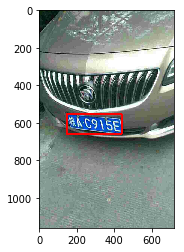

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(input[:,:,::-1])
plt.rcParams['figure.figsize']=(15, 14)
plt.show()

## Spatial Transformer Networks 

The spatial transformer network is a type of a visual attention mechanism. It allows a neural network to learn how to perform spatial transformations on the input image in order to enhance the geometric invariance of the model. Please refer to [Spatial Transformer Networks](https://arxiv.org/abs/1506.02025) for detailed information 

torch.Size([1, 3, 24, 94])


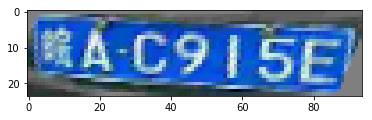

In [3]:
def convert_image(inp):
    # convert a Tensor to numpy image
    inp = inp.squeeze(0).cpu()
    inp = inp.detach().numpy().transpose((1,2,0))
    inp = 127.5 + inp/0.0078125
    inp = inp.astype('uint8') 

    return inp

STN = STNet()
STN.to(device)
STN.load_state_dict(torch.load('LPRNet/weights/Final_STN_model.pth', map_location=lambda storage, loc: storage))
STN.eval()

bbox = bboxes[0, :4]
x1, y1, x2, y2 = [int(bbox[j]) for j in range(4)]      
w = int(x2 - x1 + 1.0)
h = int(y2 - y1 + 1.0)
img_box = np.zeros((h, w, 3))
img_box = image[y1:y2+1, x1:x2+1, :]
im = cv2.resize(img_box, (94, 24), interpolation=cv2.INTER_CUBIC)
im = (np.transpose(np.float32(im), (2, 0, 1)) - 127.5)*0.0078125
data = torch.from_numpy(im).float().unsqueeze(0).to(device)  # torch.Size([1, 3, 24, 94]) 
transfer = STN(data)
print(transfer.shape)
transformed_img = convert_image(transfer)

plt.imshow(transformed_img[:,:,::-1])
plt.show()

## LPRNet architecture 

The basic building block of the model backbone was inspired by SqueezeNet Fire Blocks and Inception Blocks. The input image size is set as 94x24 pixels RGB image. The image is preprocessed by the Spatial Transformer Layer to allow better characteristics. The converted RGB image goes through the backbone and the intermediate feature maps from backbone subnet outputs are utiltized to capture important characteristics instead of using LSTM. The intermediate feature maps are augmented with the global context embedding and concatenated together. In order to adjust the depth of feature map to the character class number, additional 1x1 convolution is applied. The model output and the target character sequence lengths are of different length. Here we use length of 18 as output, for each output character, there are 68 different classes resulting from the CHARS. 

In [4]:
import torch.nn as nn
import torch

class small_basic_block(nn.Module):
    def __init__(self, ch_in, ch_out):
        super(small_basic_block, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(ch_in, ch_out // 4, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out // 4, kernel_size=(3, 1), padding=(1, 0)),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out // 4, kernel_size=(1, 3), padding=(0, 1)),
            nn.ReLU(),
            nn.Conv2d(ch_out // 4, ch_out, kernel_size=1),
        )
    def forward(self, x):
        return self.block(x)

class LPRNet(nn.Module):
    def __init__(self, class_num, dropout_rate):
        super(LPRNet, self).__init__()
        self.class_num = class_num
        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1), # 0
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),  # 2
            nn.MaxPool3d(kernel_size=(1, 3, 3), stride=(1, 1, 1)),
            small_basic_block(ch_in=64, ch_out=128),    # *** 4 ***
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),  # 6
            nn.MaxPool3d(kernel_size=(1, 3, 3), stride=(2, 1, 2)),
            small_basic_block(ch_in=64, ch_out=256),   # 8
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),  # 10
            small_basic_block(ch_in=256, ch_out=256),   # *** 11 ***
            nn.BatchNorm2d(num_features=256),   # 12
            nn.ReLU(), #13
            nn.MaxPool3d(kernel_size=(1, 3, 3), stride=(4, 1, 2)),  # 14
            nn.Dropout(dropout_rate),
            nn.Conv2d(in_channels=64, out_channels=256, kernel_size=(1, 4), stride=1),  # 16
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),  # 18
            nn.Dropout(dropout_rate),
            nn.Conv2d(in_channels=256, out_channels=class_num, kernel_size=(13, 1), stride=1), # 20
            nn.BatchNorm2d(num_features=class_num),
            nn.ReLU(),  # *** 22 ***
        )
        self.container = nn.Sequential(
            nn.Conv2d(in_channels=256+class_num+128+64, out_channels=self.class_num, kernel_size=(1,1), stride=(1,1)),
            # nn.BatchNorm2d(num_features=self.class_num),
            # nn.ReLU(),
            # nn.Conv2d(in_channels=self.class_num, out_channels=self.lpr_max_len+1, kernel_size=3, stride=2),
            # nn.ReLU(),
        )

    def forward(self, x):
        keep_features = list()
        for i, layer in enumerate(self.backbone.children()):
            x = layer(x)
            if i in [2, 6, 13, 22]: # [2, 4, 8, 11, 22]
                print("intermediate feature map {} shape is: ".format(i), x.shape)
                keep_features.append(x)

        global_context = list()
        for i, f in enumerate(keep_features):
            if i in [0, 1]:
                f = nn.AvgPool2d(kernel_size=5, stride=5)(f)
            if i in [2]:
                f = nn.AvgPool2d(kernel_size=(4, 10), stride=(4, 2))(f)
            f_pow = torch.pow(f, 2)
            f_mean = torch.mean(f_pow)
            f = torch.div(f, f_mean)
            print("after globel context {} shape is: ".format(i), f.shape)
            global_context.append(f)

        x = torch.cat(global_context, 1)
        x = self.container(x)
        print("after container shape is: ", x.shape)
        logits = torch.mean(x, dim=2)

        return logits
    
CHARS = ['京', '沪', '津', '渝', '冀', '晋', '蒙', '辽', '吉', '黑',
     '苏', '浙', '皖', '闽', '赣', '鲁', '豫', '鄂', '湘', '粤',
     '桂', '琼', '川', '贵', '云', '藏', '陕', '甘', '青', '宁',
     '新',
     '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
     'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K',
     'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
     'W', 'X', 'Y', 'Z', 'I', 'O', '-'
     ]

In [5]:
lprnet = LPRNet(class_num=len(CHARS), dropout_rate=0)
lprnet.to(device)
lprnet.load_state_dict(torch.load('LPRNet/weights/Final_LPRNet_model.pth', map_location=lambda storage, loc: storage))
lprnet.eval()
preds = lprnet(transfer)
print("output shape is: ", preds.shape)

intermediate feature map 2 shape is:  torch.Size([1, 64, 22, 92])
intermediate feature map 6 shape is:  torch.Size([1, 128, 20, 90])
intermediate feature map 13 shape is:  torch.Size([1, 256, 18, 44])
intermediate feature map 22 shape is:  torch.Size([1, 68, 4, 18])
after globel context 0 shape is:  torch.Size([1, 64, 4, 18])
after globel context 1 shape is:  torch.Size([1, 128, 4, 18])
after globel context 2 shape is:  torch.Size([1, 256, 4, 18])
after globel context 3 shape is:  torch.Size([1, 68, 4, 18])
after container shape is:  torch.Size([1, 68, 4, 18])
output shape is:  torch.Size([1, 68, 18])


## Decoding 

Based on the output matrix of the LPRNet, we want to calcuate the most likely text. The decoding function will take the argmax for each character of 18 length from the CHARS. The duplicate charaters are removed. The pseudo character denoted as "-" is inserted at some positions to allow algorithm ouputing duplicated characters. It will be removied when docoding it. for example:

* "to" -> "---tttttooo", or "-t-o-", or "to"
* "too" -> "---ttttto-o", or "-t-o-o", or "to-o", but not "too"

In [6]:
def decode(preds, CHARS):
    # greedy decode
    pred_labels = list()
    labels = list()
    for i in range(preds.shape[0]):
        pred = preds[i, :, :]
        pred_label = list()
        for j in range(pred.shape[1]):
            pred_label.append(np.argmax(pred[:, j], axis=0))
        no_repeat_blank_label = list()
        pre_c = pred_label[0]
        for c in pred_label: # dropout repeate label and blank label
            if (pre_c == c) or (c == len(CHARS) - 1):
                if c == len(CHARS) - 1:
                    pre_c = c
                continue
            no_repeat_blank_label.append(c)
            pre_c = c
        pred_labels.append(no_repeat_blank_label)
        
    for i, label in enumerate(pred_labels):
        lb = ""
        for i in label:
            lb += CHARS[i]
        labels.append(lb)
    
    return labels, np.array(pred_labels) 

preds = preds.cpu().detach().numpy()  # (1, 68, 18)
labels, pred_labels = decode(preds, CHARS)
print("label is", labels)
print("pred_labels is", pred_labels)

label is ['皖AC915E']
pred_labels is [[12 41 43 40 32 36 45]]


## LPRNet Training 

Since the LPRNet output and the target character sequence lengths are of different length, the methold of CTC loss is applied. CTC loss is well-known approach for situations where input and output squences are misaligned and variable lengths. More detailed explanation about CTC loss can be found in [An Intuitive Explanation of Connectionist Temporal Classification](https://towardsdatascience.com/intuitively-understanding-connectionist-temporal-classification-3797e43a86c). 

Pytorch has in-build ctc_loss function. The function accepts 

1. logarithmized probabilities of the outputs - log_probs in form of (T,N,C) where C = number of characters in CHARS including blank; T = input length and N = batch_size

2. targets: (N, S) or (sum(target_lengths)

3. input_lengths: (N)

4. raget_lengths: (N)

In [7]:
ctc_loss = nn.CTCLoss(blank=len(CHARS)-1, reduction='mean') # reduction: 'none' | 'mean' | 'sum'

imgs = torch.randn(2,3,24,94)
labels = torch.randint(1,68, (14,), dtype=torch.long)

input_lengths = (18, 18)
target_lengths = (7,7)

transfer = STN(imgs)
logits = lprnet(transfer)  # torch.Size([batch_size, CHARS length, output length ])
log_probs = logits.permute(2, 0, 1) # for ctc loss: length of output x batch x length of chars
log_probs = log_probs.log_softmax(2).requires_grad_()       
loss = ctc_loss(log_probs, labels, input_lengths=input_lengths, target_lengths=target_lengths)

print('loss is: ', loss)

intermediate feature map 2 shape is:  torch.Size([2, 64, 22, 92])
intermediate feature map 6 shape is:  torch.Size([2, 128, 20, 90])
intermediate feature map 13 shape is:  torch.Size([2, 256, 18, 44])
intermediate feature map 22 shape is:  torch.Size([2, 68, 4, 18])
after globel context 0 shape is:  torch.Size([2, 64, 4, 18])
after globel context 1 shape is:  torch.Size([2, 128, 4, 18])
after globel context 2 shape is:  torch.Size([2, 256, 4, 18])
after globel context 3 shape is:  torch.Size([2, 68, 4, 18])
after container shape is:  torch.Size([2, 68, 4, 18])
loss is:  tensor(30.7238, grad_fn=<MeanBackward1>)
